# Курс аналитик данных на Python
## Модуль 6.2 Выборочные методы оценки статистик

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
gen_pop = norm.rvs(loc=10, scale=3, size=10000, random_state=17)  
# Эмулируем 10000 наблюдений с нормальным распределением

In [4]:
gen_pop.shape

(10000,)

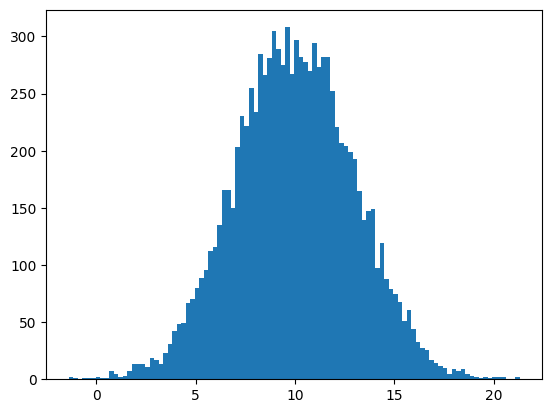

In [5]:
plt.hist(gen_pop,bins=100);

In [6]:
gen_pop.mean(), np.median(gen_pop), gen_pop.std()

(9.979610663409664, 9.968633735112295, 3.002403460948877)

In [7]:
only_greater_10 = gen_pop[gen_pop>10]  # Все наблюдения > 10

In [8]:
only_greater_10.shape

(4956,)

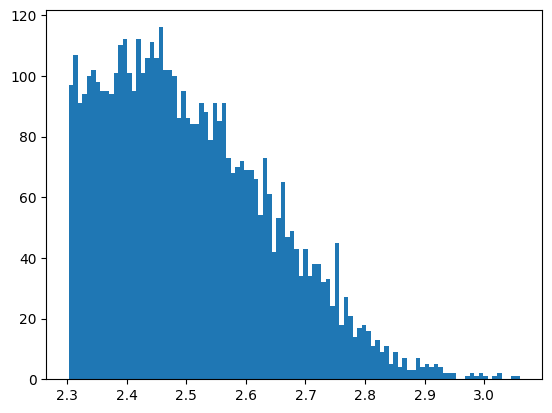

In [9]:
plt.hist(np.log(only_greater_10),bins=100);

In [10]:
only_greater_10.mean(), np.median(only_greater_10), only_greater_10.std()
#  слишком сильно различаются оценки от оригинала, поэтому такое не подходит

(12.406251439332094, 12.025918391395187, 1.796052654114772)

In [17]:
random_sample = np.random.choice(gen_pop, size=2000, replace=False)
# 2000 рандомных наблюдений (size), без возвращения (replace)

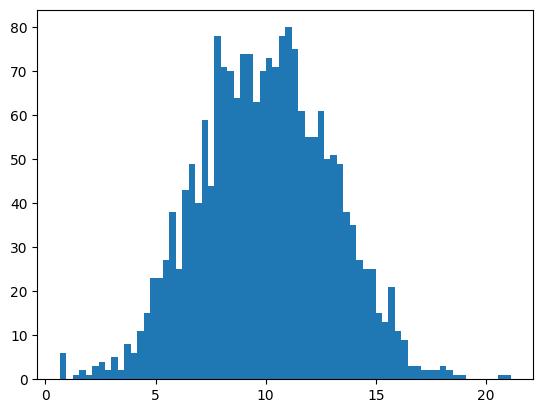

In [18]:
plt.hist(random_sample,bins=70);

In [19]:
random_sample.mean(), np.median(random_sample), random_sample.std() 
# Параметры уже ближе к оригиналу (генеральной совокупности)

(9.992748910866656, 10.01141457607021, 2.9874561259776558)

In [20]:
gen_pop.mean(), np.median(gen_pop), gen_pop.std()

(9.979610663409664, 9.968633735112295, 3.002403460948877)

<center><h2>Оценки параметров</h2></center>
Выборочная совокупность при верном отборе стремится к генеральной совокупности, а генеральная совокупность - к случайной величине.
В свою очередь, у случайной величины есть параметры, которые задают форму её распределения. Нам нужно уметь оценивать эти параметры для того, чтобы делать выводы для генеральной совокупности.

Нормальное распределение

<center><img src="../img/norm.png" alt="hop hop loshok" width="100"></center>
Матожидание - EX, диспрерсия - DX

Оценка должна быть:
<ol>
    <li> Несмещенной - ее математическое ожидание равно оцениваемому
параметру</li>
    <li> Состоятельной -  удовлетворяет закону больших чисел, т.е. сходится по вероятности к оцениваемому параметру.</li>
    <li>Эффективной - имеет наименьшую дисперсию среди всех возможных несмещенных оценок параметра, вычисленных по выборкам одного и того же объема n.</li>
</ol>

В случае нормального распределения лучшея оценка EX - это выборочная средняя, а лучшая оценка DX - выборочная дисперсия.